In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import itertools
import scipy.stats as st

# Probability Concepts: Labs
## Author Solutions

### 1. Birthday Problem
The **birthday problem** is a famous paradox in probability theory. The results are surprising at first but a careful analysis "lifts" the paradox.

**Problem statement:** How many people do we need to have in a room, so that the probability of two people sharing the same birthday is $p(A) \ge 0.5$?

**Calculation:** Let's assume a 365-day year. Let's suppose that we're looking for $r$ people sharing a birthday. Let's also order the people 1 to $r$. Since the birthdays are independent, the probability of two people **not** sharing a birthday is:
$$ p = \frac{365.364. \cdots .(365 - r + 1)}{365^r} $$.

First, we'll create a function to calculate the probability p given r:

In [2]:
def calc_birthday_probability(people):
    numerator = 1
    for r in range(1, people + 1):
        numerator *= 365 - r + 1
    denominator = 365 ** people
    return numerator / denominator

Then, we're going to see the transition in probability around $r = 23$. Note that since this was the inverse probability (of two people **not** sharing a birthday, we're printing $1-p$):

In [3]:
for r in [30, 24, 23, 22, 20]:
    print(str(r) + " -> " + str(1 - calc_birthday_probability(r)))

30 -> 0.7063162427192686
24 -> 0.5383442579145288
23 -> 0.5072972343239854
22 -> 0.4756953076625501
20 -> 0.41143838358057994


We saw that if we have 23 people, there's (slightly more than) 50% chance they share the same birthday. It's a little counterintuitive at first but we can resolve the paradox if we remember that we're comparing **everyone against everyone else**.

Let's now plot how the probability of two people sharing the same birthday behaves (using [this plot](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Birthday_Paradox.svg/2000px-Birthday_Paradox.svg.png) as an inspiration):

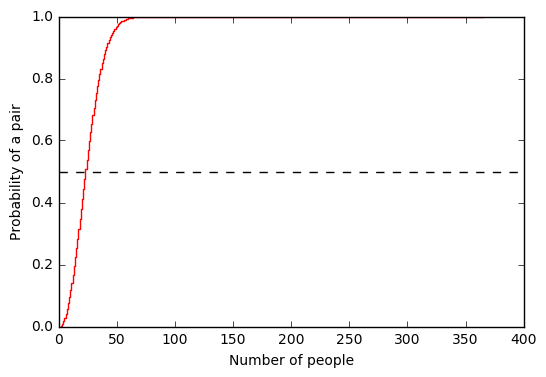

In [4]:
days = np.arange(1, 366)
probabilities = np.zeros(365)
for day in range(len(days)):
    probabilities[day] = 1 - calc_birthday_probability(day)
plt.step(days, probabilities, color = "red")
plt.xlabel("Number of people")
plt.ylabel("Probability of a pair")
plt.axhline(0.5, color = "black", linestyle = "dashed")
plt.show()

### 2. Visualizing Permutations and Variations
We're going to use `itertools` to see:
1. All permutations of integers in [1; 10]
2. All variation of 3 integers in [1; 10]
3. All anagrams of a word

In the case of anagrams, we could extend the function to check for valid words and display only these. We could do that using a dictionary (for example, the unix dictionary), reading it (into a set for best performance) and checking whether each word we generated is valid. We're not going to do this for simplicity.

In [5]:
nums = np.arange(1, 11)
perms = itertools.permutations(nums)
# Note that perms is a generator. Since there are over 3.5 million permutations, let's just see the first few
print("First 20 permutations:")
for p in range(20):
    print(perms.__next__())
    
variations = itertools.permutations(nums, 3)
# The variations are fewer but still take a lot of space on screen, so let's also constrain them
print("First 20 variations:")
for p in range(20):
    print(variations.__next__())
    
anagrams = itertools.permutations("emits") # We don't even need to split the characters, itertools does that for us
print("First 20 anagrams of \"emits\":")
for p in range(20):
    print("".join(anagrams.__next__()))


First 20 permutations:
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
(1, 2, 3, 4, 5, 6, 7, 8, 10, 9)
(1, 2, 3, 4, 5, 6, 7, 9, 8, 10)
(1, 2, 3, 4, 5, 6, 7, 9, 10, 8)
(1, 2, 3, 4, 5, 6, 7, 10, 8, 9)
(1, 2, 3, 4, 5, 6, 7, 10, 9, 8)
(1, 2, 3, 4, 5, 6, 8, 7, 9, 10)
(1, 2, 3, 4, 5, 6, 8, 7, 10, 9)
(1, 2, 3, 4, 5, 6, 8, 9, 7, 10)
(1, 2, 3, 4, 5, 6, 8, 9, 10, 7)
(1, 2, 3, 4, 5, 6, 8, 10, 7, 9)
(1, 2, 3, 4, 5, 6, 8, 10, 9, 7)
(1, 2, 3, 4, 5, 6, 9, 7, 8, 10)
(1, 2, 3, 4, 5, 6, 9, 7, 10, 8)
(1, 2, 3, 4, 5, 6, 9, 8, 7, 10)
(1, 2, 3, 4, 5, 6, 9, 8, 10, 7)
(1, 2, 3, 4, 5, 6, 9, 10, 7, 8)
(1, 2, 3, 4, 5, 6, 9, 10, 8, 7)
(1, 2, 3, 4, 5, 6, 10, 7, 8, 9)
(1, 2, 3, 4, 5, 6, 10, 7, 9, 8)
First 20 variations:
(1, 2, 3)
(1, 2, 4)
(1, 2, 5)
(1, 2, 6)
(1, 2, 7)
(1, 2, 8)
(1, 2, 9)
(1, 2, 10)
(1, 3, 2)
(1, 3, 4)
(1, 3, 5)
(1, 3, 6)
(1, 3, 7)
(1, 3, 8)
(1, 3, 9)
(1, 3, 10)
(1, 4, 2)
(1, 4, 3)
(1, 4, 5)
(1, 4, 6)
First 20 anagrams of "emits":
emits
emist
emtis
emtsi
emsit
emsti
eimts
eimst
eitms
eitsm
eismt
eistm
etmis
etmsi


### 3. Shuffling a Deck of Cards
In this exercise, we're going to use the famous **Fisher - Yates shuffle** algorithm to shuffle a deck of cards. Shuffling is essentially creating a random permutation. This algorithm does this correctly and is also very fast (linear time with respect to the length of the input).

In [6]:
def generate_cards():
    suits = ["♥","♦", "♣", "♠"]
    faces = list(range(2, 11)) + ["J", "Q", "K", "A"]
    return list(map(lambda x: str(x[0]) + x[1],     itertools.product(faces, suits)))
def shuffle_cards(cards):
    for i in np.arange(len(cards) - 1, 0, -1):
        j = np.random.randint(0, i + 1)
        cards[i], cards[j] = cards[j], cards[i]
    return cards

print("Three shuffles of the deck:")
for i in range(3):
    print(" ".join(shuffle_cards(generate_cards())))
    print()

Three shuffles of the deck:
3♠ 6♣ 6♦ 8♠ 4♦ 2♣ 7♦ J♦ 5♣ 3♥ K♥ 10♦ K♦ 9♣ 8♥ 3♦ 2♦ 2♠ 10♠ 2♥ Q♠ A♦ J♣ Q♥ J♠ 5♠ K♣ 4♥ 6♠ 9♦ 3♣ Q♦ A♥ 5♥ Q♣ 4♠ 7♠ 7♥ 4♣ 10♥ 8♦ 7♣ A♣ 8♣ J♥ 10♣ 5♦ A♠ 9♥ 9♠ 6♥ K♠

J♥ 6♠ 2♣ 5♦ 10♦ K♠ 8♥ Q♦ Q♣ 8♣ J♣ K♣ 6♦ 4♠ 4♥ Q♠ K♥ 2♦ 3♣ 10♠ 7♦ 9♥ 7♠ 3♥ J♦ 9♠ Q♥ 9♦ 9♣ 7♥ 4♦ 5♠ A♥ 3♠ 6♣ 8♦ A♣ 7♣ 3♦ 4♣ 10♥ 8♠ A♠ K♦ 6♥ J♠ 10♣ A♦ 2♥ 5♣ 2♠ 5♥

A♦ Q♦ 8♥ K♠ 5♠ 6♥ Q♣ Q♠ 2♦ Q♥ 6♠ 4♠ 7♠ 3♥ A♠ 10♠ 6♦ 10♦ J♣ 8♦ 4♥ 3♦ K♣ J♥ A♣ K♦ 9♠ 7♦ 5♦ 2♥ 10♣ 8♣ 9♥ 10♥ 9♣ J♠ A♥ 9♦ 8♠ 3♣ 5♣ 7♣ 4♦ 7♥ 4♣ 5♥ 3♠ 6♣ J♦ 2♣ 2♠ K♥



### 4. Visualizing Combinations
We're going to use `itertools` once again to visualize combinations. First, we'll generate combinations of random numbers, after that - combinations of strings (fruit salad recipes).

In [7]:
def get_combinations(numbers, k):
    return itertools.combinations(numbers, k)

import numpy as np
numbers = np.random.uniform(-10, 10, 20)
print("Numbers:")
print(numbers)

combinations = get_combinations(numbers, 4)
print("First 20 combinations:")
for p in range(20):
    print(combinations.__next__())
    

def print_salad_recipes(fruits):
    # In this case we'll only print some recipes chosen at random to save notebook space.
    # Uncomment the print() statement at the end of the loops to see all recipes
    recipes = []
    for n_fruits in range(2, len(fruits) + 1):
        for recipe in itertools.combinations(fruits, n_fruits):
            recipes.append(recipe)
            # print(recipe)
    return recipes
    
fruits = ["apple", "grapes", "banana", "kiwi", "orange", "apricot", "cherry", "blueberry", "strawberry"]
recipes = print_salad_recipes(fruits)
print("All recipes count: " + str(len(recipes)))
print("10 random recipes:")
print(np.random.choice(recipes, 10))

Numbers:
[-8.18803891  3.87564449  4.7291958  -7.37208558 -7.13490045 -6.9908102
  8.17847439 -1.9189942  -6.60431424  6.1907269   5.37739035  3.16939914
  8.08736928 -4.9170229  -7.90981038 -3.6389879  -8.17403602  0.66863258
 -8.13718616 -3.7517117 ]
First 20 combinations:
(-8.1880389078638558, 3.8756444915064758, 4.7291958017322706, -7.3720855842345152)
(-8.1880389078638558, 3.8756444915064758, 4.7291958017322706, -7.1349004497061337)
(-8.1880389078638558, 3.8756444915064758, 4.7291958017322706, -6.990810197468611)
(-8.1880389078638558, 3.8756444915064758, 4.7291958017322706, 8.1784743868596337)
(-8.1880389078638558, 3.8756444915064758, 4.7291958017322706, -1.918994200640995)
(-8.1880389078638558, 3.8756444915064758, 4.7291958017322706, -6.604314239524081)
(-8.1880389078638558, 3.8756444915064758, 4.7291958017322706, 6.1907268979246872)
(-8.1880389078638558, 3.8756444915064758, 4.7291958017322706, 5.3773903460560426)
(-8.1880389078638558, 3.8756444915064758, 4.7291958017322706, 3.16

### 5. Random Uniform Numbers
We're going to use `numpy` to generate random uniform numbers. We'll also show **the law of big numbers**: if we sample a lot of times, the histogram of the sample will represent the histogram of the population better. 

For reference, the histogram of the population should look like a perfect rectangle if the number of trials approaches infinity.

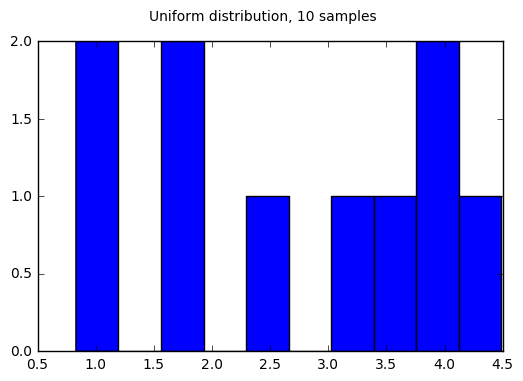

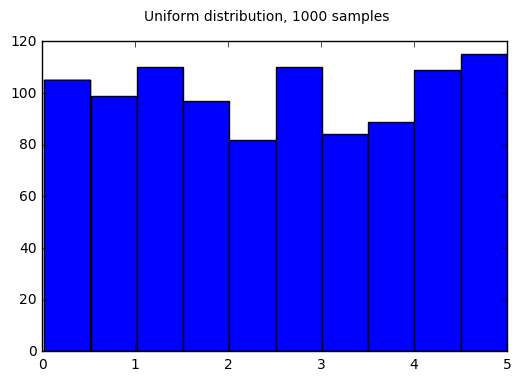

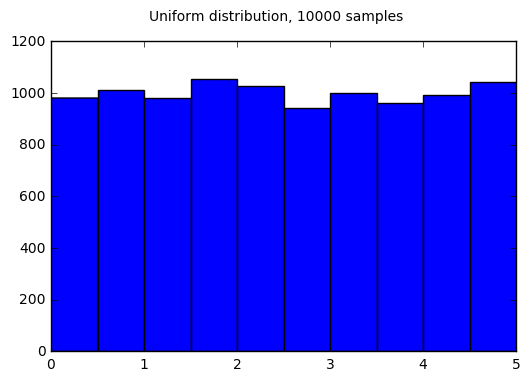

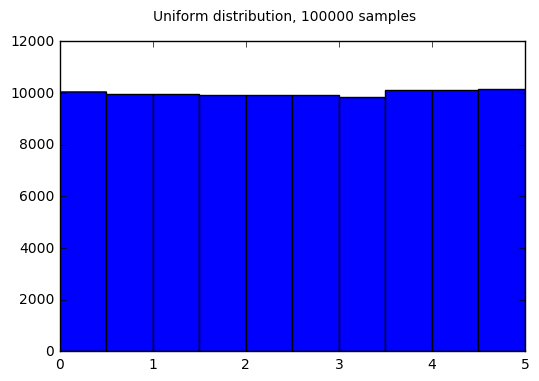

In [8]:
def generate_random_numbers(n):
    return np.random.uniform(0, 5, n)

for n in [10, 1000, 10000, 100000]:
    plt.figure()
    plt.suptitle("Uniform distribution, " + str(n) + " samples")
    plt.hist(generate_random_numbers(n))
    plt.show()

### 6. Coin Toss
We're going to simulate a coin toss. This is also known as a Bernoulli process. We're going to assign 0 for heads and 1 for tails to make plotting easier.

In the first case, we have a **fair** coin (with equal probability of heads and tails). In the second case we have a **biased** (unfair) coin - with 70% probability of heads.

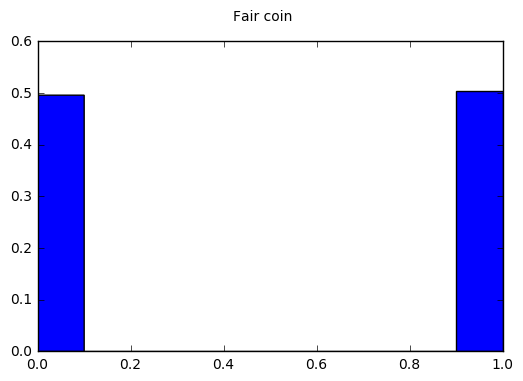

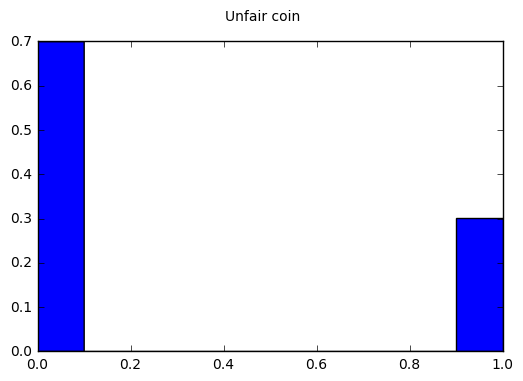

In [9]:
def toss_fair_coin():
    return 0 if np.random.random() <= 0.5 else 1

def toss_unfair_coin():
    return 0 if np.random.random() <= 0.7 else 1

def plot_results(toss_function, title):
    num_tosses = 10000
    tosses = np.zeros(num_tosses)
    for toss in range(num_tosses):
        tosses[toss] = toss_function()
    
    plt.suptitle(title)
    plt.hist(tosses, weights = np.zeros_like(tosses) + 1. / len(tosses))
    plt.show()

plot_results(toss_fair_coin, "Fair coin")
plot_results(toss_unfair_coin, "Unfair coin")

### 7. Playing Darts
We're going to find the radial probability distibution of hitting a dart board. This is an example of a class of randomized algorithms called **Monte Carlo algorithms**.

The dart board is centered at the origin and has radius 1. We're going to generate many random "attempts" at the bounding box - the square defined by $|x| <= 1, |y| <= 1$. We'll just ignore the points outside the circle. For each attempt, we'll calculate the distance from the center $r = \sqrt{x^2 + y^2}$.

To plot the radial distribution, we'll slice the dart board into concentric circles with a sufficiently small "thickness" $dr$. We'll then plot a histogram of the distribution.

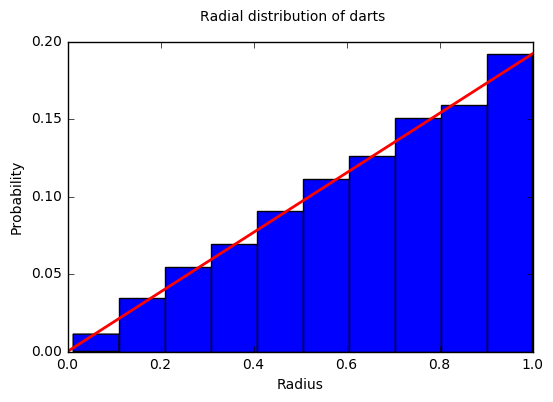

In [10]:
attempts = 10000
# Generate random attempts
x = np.random.uniform(-1, 1, attempts)
y = np.random.uniform(-1, 1, attempts)

# Calculate the distances and ignore darts thrown outside the circle
r = np.sqrt(x ** 2 + y ** 2)
r = r[r <= 1]

# Plot the results
counts, bins, patches = plt.hist(r, weights = np.zeros_like(r) + 1. / len(r))
plt.suptitle("Radial distribution of darts")
plt.xlabel("Radius")
plt.ylabel("Probability")
plt.plot([0, 1], [0, counts[-1]], color = "red", linewidth = 2)
plt.show()

### 8. Binomial Distribution
In this lab, we'll explore the meaning of the parameters in the binomial distribution. It's given as:
$$ f(k|n, p) = \binom{n}{k} p^k(1-p)^{n-k} $$

We'll plot distributions with different $n$ and $p$ and see how they affect the overall distribution shape.

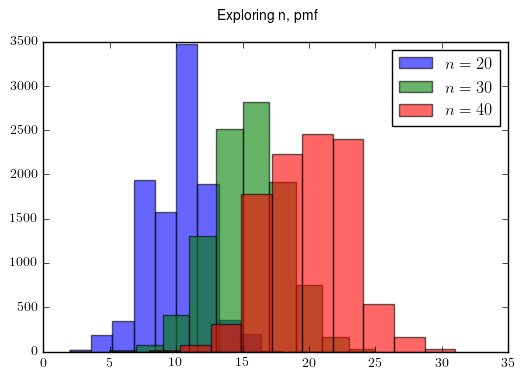

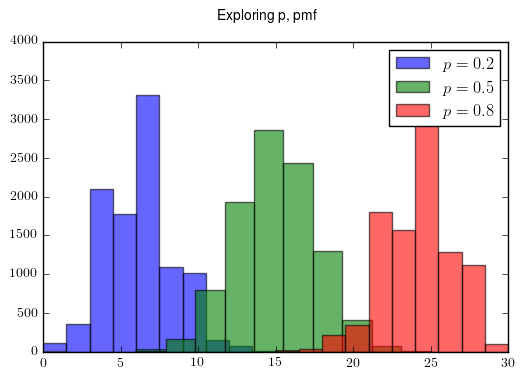

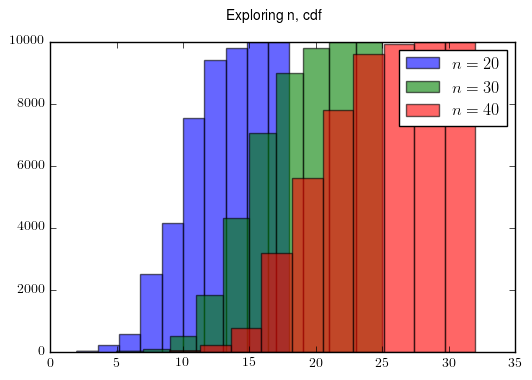

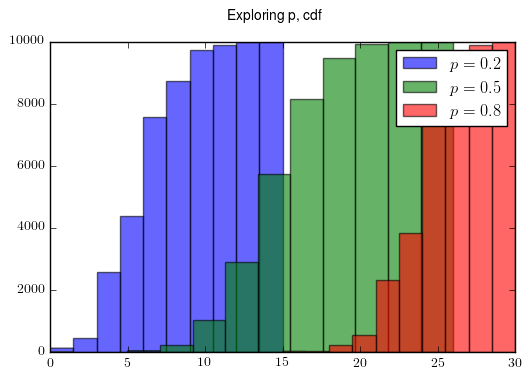

In [11]:
plt.rc("text", usetex = True)
for n in [20, 30, 40]:
    plt.hist(st.binom.rvs(n, 0.5, size = 10000), alpha = 0.6, label = "$n = " + str(n) + "$")
    plt.suptitle("Exploring n, pmf")
    plt.legend()
plt.show()
for p in [0.2, 0.5, 0.8]:
    plt.hist(st.binom.rvs(30, p, size = 10000), alpha = 0.6, label = "$p = " + str(p) + "$")
    plt.suptitle("Exploring p, pmf")
    plt.legend()
plt.show()
for n in [20, 30, 40]:
    plt.hist(st.binom.rvs(n, 0.5, size = 10000), cumulative = True, alpha = 0.6, label = "$n = " + str(n) + "$")
    plt.suptitle("Exploring n, cdf")
    plt.legend()
plt.show()
for p in [0.2, 0.5, 0.8]:
    plt.hist(st.binom.rvs(30, p, size = 10000), cumulative = True, alpha = 0.6, label = "$p = " + str(p) + "$")
    plt.suptitle("Exploring p, cdf")
    plt.legend()
plt.show()

We can see from the plots (and also by carefully observing the formula) that $n$ accounts for how "spread out" the function is. If $n$ goes larger, the bins are more to the right and more spread out. Also, $p$ accounts for where the "center" of the distribution is (what proportion of all trials are positive).

### 9. Poisson Distribution
We'll do the same type of plots like in the previous task, but now for the parameter $\lambda$ of the Poisson distribution:
$$ f(k|\lambda) = \frac{\lambda^k e^{-\lambda}}{k!} $$

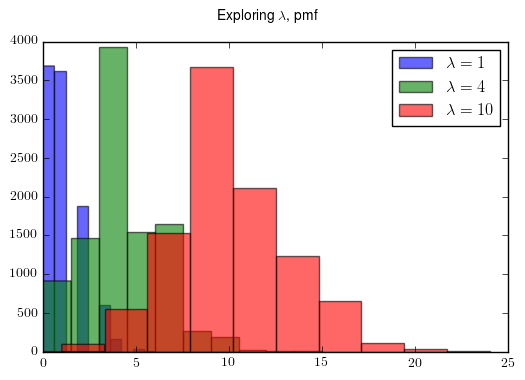

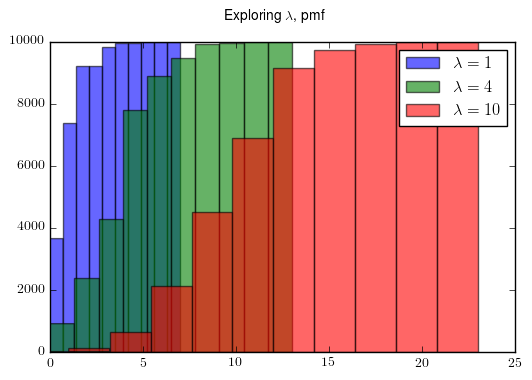

In [12]:
for l in [1, 4, 10]:
    plt.hist(st.poisson.rvs(l, size = 10000), alpha = 0.6, label = "$\lambda = " + str(l) + "$")
    plt.suptitle("Exploring $\lambda$, pmf")
    plt.legend()
plt.show()
for l in [1, 4, 10]:
    plt.hist(st.poisson.rvs(l, size = 10000), cumulative = True, alpha = 0.6, label = "$\lambda = " + str(l) + "$")
    plt.suptitle("Exploring $\lambda$, pmf")
    plt.legend()
plt.show()

We can see that $\lambda$ controls how spread out the distribution is. It's the number of occurrences of the event we're modelling with the Poisson distribution.

### 10. Normal Distribution
We're going to explore the parameters $\mu$ and $\sigma$ in the normal distribution:
$$ f(x|\mu, \sigma^2) = \frac{1}{2\pi \sigma^2}e^{-\frac{x - \mu}{2\sigma^2}} $$

We'll also plot the pdf and cdf of the **standard normal distribution** ($\mu = 0, \sigma = 1$).

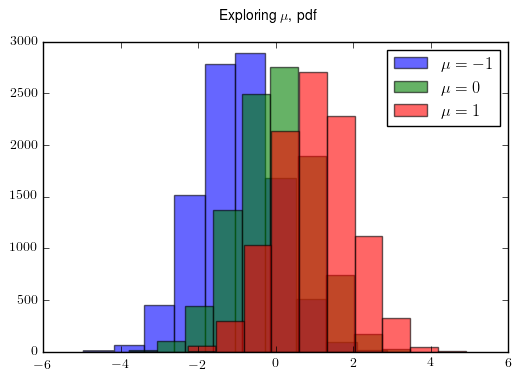

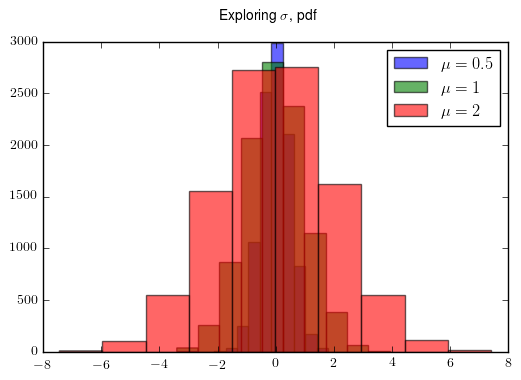

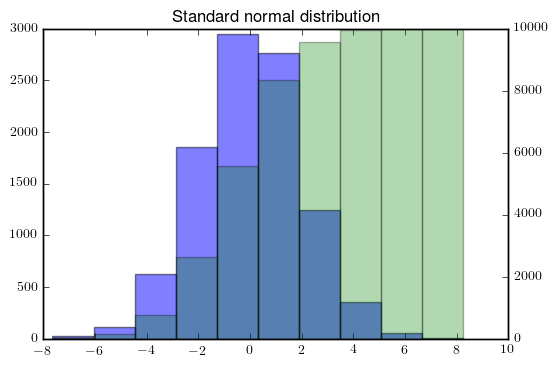

In [13]:
for mu in [-1, 0, 1]:
    plt.hist(st.norm.rvs(mu, 1, size = 10000), alpha = 0.6, label = "$\mu = " + str(mu) + "$")
    plt.suptitle("Exploring $\mu$, pdf")
    plt.legend()
plt.show()
for sigma in [0.5, 1, 2]:
    plt.hist(st.norm.rvs(0, sigma, size = 10000), alpha = 0.6, label = "$\mu = " + str(sigma) + "$")
    plt.suptitle("Exploring $\sigma$, pdf")
    plt.legend()
plt.show()

samples = st.norm.rvs(0, sigma, size = 10000)
f, ax = plt.subplots()
ax.set_title("Standard normal distribution")
pdf, bins, pdf_patches = ax.hist(samples, alpha = 0.5, label = "pdf")
ax2 = ax.twinx()
cdf, bins, cdf_patches = ax2.hist(samples, cumulative = True, alpha = 0.3, color = "green", label = "cdf")
plt.show()

We see that $\mu$ controls the "center" of the distribution and $\sigma$ controls the "spread" of the distribution.

### 11. Central Limit Theorem
According to the Central Limit Theorem, sums of variables will tend to be normal, no matter what the individual distributions are.

In order to check the theorem, we're going to draw random numbers from different distributions, shown below:
$$
f(x) = 1 \\
f(x) = 2x \\
f(x) = 3x^2 \\
f(x) = 4|x - 0.5| \\
f(x) = 2 - 4|x - 0.5|
$$

For each distribution, we're going to perform 1000 experiments. In each experiment, we're going to pick 25 numbers and sum them. Finally, we'll plot the sums.

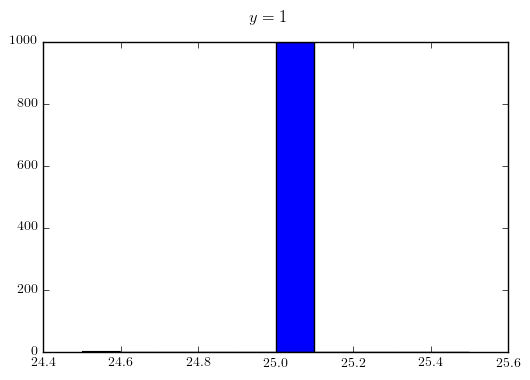

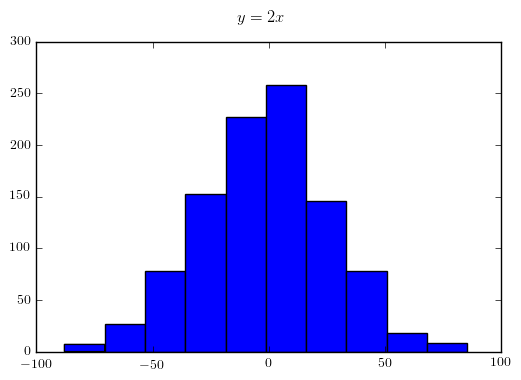

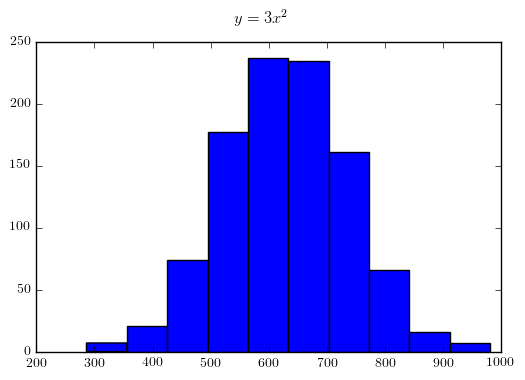

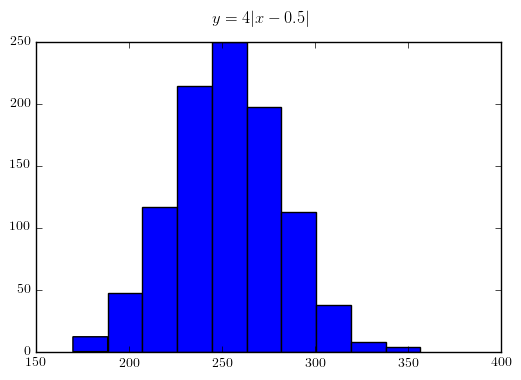

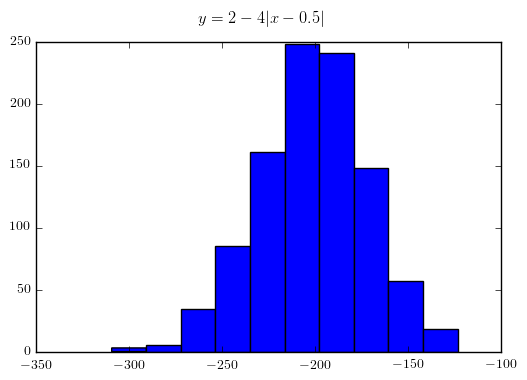

In [14]:
x = np.arange(-5, 5, 0.01)
for (f, title) in [
    (lambda x: 1, "$y = 1$"),
    (lambda x: 2 * x, "$y = 2x$"),
    (lambda x: 3 * x**2, "$y = 3x^2$"),
    (lambda x: 4 * np.abs(x - 0.5), "$y = 4|x - 0.5|$"),
    (lambda x: 2 - 4 * np.abs(x - 0.5), "$y = 2 - 4|x - 0.5|$")]:
    y = np.vectorize(f)(x)
    experiment_results = np.zeros(1000)
    for experiment in range(1000):
        current_sum = np.random.choice(y, 25).sum()
        experiment_results[experiment] = current_sum
    plt.hist(experiment_results)
    plt.suptitle(title, fontsize = "large")
    plt.show()

We can see that:
1. The constant distribution $y = 1$ is not susceptible to forming a normal distribution. This is because we're getting 25 in all cases (25 * 1).
2. All other sums tend to normal (with different parameters).

You can see all distributions together if you comment out the `plt.show()` at the end.